In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

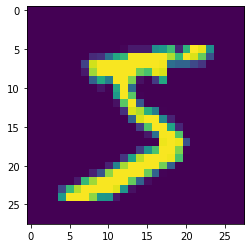

In [ ]:
plt.imshow(x_train[0])

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
len(set(y_train))

10

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten, Input
from tensorflow.keras.models import Model

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, activation='relu', input_shape=(28,28)))
model.add(Dropout(0.2))
model.add(LSTM(200, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 100)           51600     
                                                                 
 dropout (Dropout)           (None, 28, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 28, 200)           240800    
                                                                 
 dropout_1 (Dropout)         (None, 28, 200)           0         
                                                                 
 flatten (Flatten)           (None, 5600)              0         
                                                                 
 dense (Dense)               (None, 100)               560100    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 120s 62ms/step - loss: 0.2900 - accuracy: 0.9112 - val_loss: 0.0924 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0975 - accuracy: 0.9714 - val_loss: 0.0665 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 112s 59ms/step - loss: 0.0726 - accuracy: 0.9785 - val_loss: 0.0552 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.0392 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0396 - val_accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0340 - accuracy: 0.9901


[0.033976681530475616, 0.9901000261306763]

99.01% accuracy is achieved!!